# Belief propagation for quantum LDPC codes

In this notebook we finally get to stack classical methods so they could be used to correct quantum errors.

In the classical case, where we have a codeword $\vec{c}$ and an error $\vec{e}$ the decoder output could be one of the following:

1. A decoder failure. This is where the decoder is unable to recover $\vec{c}$ (or equivalently, $\vec{e}$), and is aware that it failed (by calculating $H\cdot \vec{c'} \neq \vec{0}$)

2. Decoder error. This is where the decoder beleives it found a solution, $\vec{c}$ (or equivalently, $\vec{e}$), where $H\cdot \vec{c'} = \vec{0}$, however, $\vec{c}\neq \vec{c'}$.

3. Decoder success. This is where the right solution was found.

Of the above three options, 3. is most desirable, however 3. is most dangereous and least desirable, and sometimes reffered to as false packet arrival (FPA) or silent data corruption (SDC).


In 
[High-threshold and low-overhead fault-tolerant quantum memory](https://arxiv.org/abs/2308.07915)
A logical error is declared if $E$ and $E^*$ have the same syndrome, but they differ by a non identity logical operator.

From [Classical product code constructions for quantum Calderbank-Shor-Steane codes](https://quantum-journal.org/papers/q-2024-07-22-1420/pdf/)

We have two binary matrices, $H^Z$ which defines the $Z$ generators, and $H^X$, which defines the $X$ generators. 

Now, any Pauli operator $P$ defined by $(v^X,v^Z)$ that's made of just Xs (in some, not necessarily all indices) will commute with all the X generators of the code. 

It may, however, not commute with the Z generators of the code. This happens exactly when the number of overlapping indices between the where that operator has an X and (at least one of) a Z generator is odd, namely when:
$$H^X \cdot v^Z \neq 0 \ \ \ (modulu \ 2) $$

However, whenever we have  
$$H^X \cdot v^Z = 0 \ \ \ (modulu \ 2) $$
There are two options:

1. $v^Z$ either is a valid stabilizer, or a multiplication of a few of them (addition over $F(2)$) meaning, $v^Z \in span( (H^Z)^T )$
2. $v^Z$ is not in the stabilizer group of the code, namely: $v^Z \notin span( (H^Z)^T )$, in which it is a logical operator.

In the case that $v^Z \notin span( (H^Z)^T )$ and still $H^X \cdot v^Z = 0 \ \ \ (modulu \ 2) $, we say that $v^Z$ is a logical error.

We can check whether $v^Z$ is in $span((H^Z)^T)$ by appending it to $((H^Z)^T$ and using Gaussian elimination (assuming full rank to begin with).

From the paper:

""

For quantum CSS codes, one can distinguish different kinds of code minimum distance which we refer to as the pure distance $δ$ and the code distance $d$. The pure distances for X and Z errors are given, respectively, by 
$$\delta^x := min\{|v^x| : H^z \cdot v^x = 0, v^x \neq 0\}$$
$$\delta^z := min\{|v^z| : H^x \cdot v^z = 0, v^z \neq 0\}$$

and we simply call 
$$\delta := min(\delta^x, \delta^z)$$

the pure distance. By contrast, the code distances for X and Z errors are obtained by considering only errors patterns that do not leave the code-subspace invariant and thus do result in a logical error:
$$d^x := min \{|v^x| : H^z v^x = 0, v^x \in span((H^x)^T)\}$$
$$d^z := min \{|v^z| : H^x v^z = 0, v^z \in span((H^z)^T)\}$$

We call $d := min(d^x, d^z)$ the code distance. Note that we always have $d ≥ δ$ and $d$ can be significantly larger than $δ$ in certain cases.


""


Belief propagation generally works on factor graphs. In our context, we have a set of nodes that correspond to qubits, $V$, and another set of nodes that correspond to checks (factors in factor graph terminoplogy) $C$.

We will also have a set of edges $E$, that will connect nodes in $V$ to checks in $C$ (but not checks to checks or qubit nodes to qubit nodes). The set of edges, in our context, is given either by a parity check matrix, or a set of stabilizer generators.
When two checks $c,c'$ are both connected to $q,q'$, we will have a 4-cycle: $(q,c), (c,q'), (q',c'), (c',q)$.  

Th idea is to use BP for the binary parity check matrix for the Z generators, and seperately use the parity check matrix for the X generators.


Plan for this workbook:

1.	Run bp+osd with a single code and parameters from the Degenerate Quantum LDPC Codes With Good Finite Length
Performance. If possible, add a code from Improved belief propagation is sufficient for real-time decoding of quantum memory (which is taken from here https://link.aps.org/accepted/10.1103/PhysRevA.88.012311), and same for a single code from Decoding Across the Quantum LDPC Code Landscape
2.	Set the number of iterations to 0, 1, 10, 20, 100, 1000, 10000 and plot graphs. Is there a difference ?
3.	So reading into 2005.07016, the conclusion is that you run X type error solely, then maybe if you want you can simulate Z type errors solely, but in any case you restrict yourself to hx or hz but not both.
4.	Start with the codes in here Degenerate Quantum LDPC Codes With Good Finite Length Performance
a.	A1
b.	B1 (if possible)
c.	C1 (if possible)
d.	Maybe D1 if possible


References:
1. Degenerate Quantum LDPC Codes With Good Finite Length Performance https://arxiv.org/pdf/1904.02703
2. Decoding Across the Quantum LDPC Code Landscape https://arxiv.org/pdf/2005.07016
3. Quantum Kronecker sum-product low-density parity-check codes with finite rate https://link.aps.org/accepted/10.1103/PhysRevA.88.012311
4. BP+OSD code https://github.com/quantumgizmos/bp_osd
5. High-threshold and low-overhead fault-tolerant quantum memory
6. On the iterative decoding of sparse quantum codes


Follow up that is not covered in this notebook yet:
1. Decoding Quantum Tanner 
2. Loopy Belief Propagation: Convergence and Effects of Message Errors
3. Probabilistic Graphical Models: A Concise Tutorial https://arxiv.org/pdf/2507.17116
4. Improved belief propagation is sufficient for real-time decoding of quantum memory https://arxiv.org/pdf/2506.01779



<Unnamed CSS code>
 -Block dimensions: Pass
 -PCMs commute hz@hx.T==0: Pass
 -PCMs commute hx@hz.T==0: Pass
 -lx \in ker{hz} AND lz \in ker{hx}: Pass
 -lx and lz anticommute: Pass
 -<Unnamed CSS code> is a valid CSS code w/ params [254,28,nan]
(63, 126)
(63, 126)
113


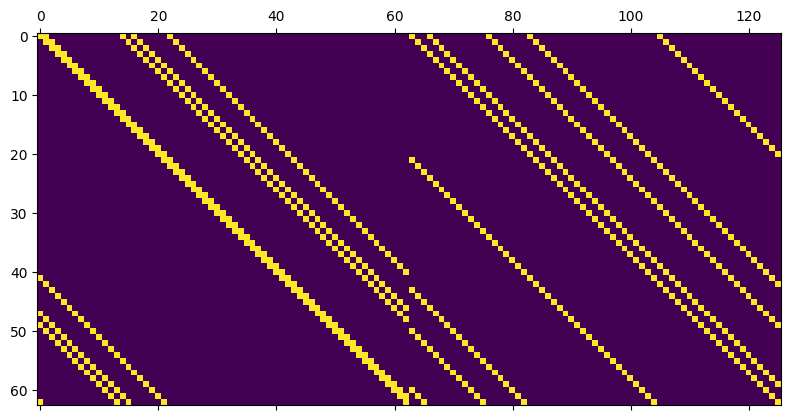

In [1]:
import numpy as np
from ldpc import BpOsdDecoder
from ldpc.codes import rep_code
from bposd.hgp import hgp
from qecc.polynomialCodes import A1_HX, A1_HZ, A2_HX, A2_HZ, A3_HX, A3_HZ, A4_HX, A4_HZ, A5_HX, A5_HZ,  A6_HX, A6_HZ, codes
from bposd.css import css_code
from scipy.linalg import lu
import matplotlib.pyplot as plt
from qecc import funWithMatrices
import numpy as np
seed = 7134066
localRandom = np.random.RandomState(seed)
import copy





#a = data['hx']

# The codes from P&K don't have full rank.
# for c in codes.keys():
#     print(codes[c].shape)
#     _,_,rank = funWithMatrices.binaryGaussianEliminationOnRows(copy.copy(codes[c].astype(np.bool)))
#     print(f"My code says the rank is {rank}")
    
c = css_code(hx = A1_HX, hz = A1_HZ)    
c.test()
print(A2_HZ.shape)
print(A2_HX.shape)
254-28
254-127
_,_,rank = funWithMatrices.binaryGaussianEliminationOnRows(copy.copy(A1_HX.astype(np.bool)))
print(rank)
254-113
plt.matshow(A2_HX)

So how do we evaluate a code ?
1. We'll load a matrix which will be either the $H^Z$ or $H^X$ matrix of the code  (for now we'll focus on X or Z errors only).
2. We'll define a range of error probabilities to test the code over.
3. 

In [ ]:



#rangeFromDecodingAcrossTheQuantumLDPCCodeLandscape = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

#rangeFromDecodingAcrossTheQuantumLDPCCodeLandscape = rangeFromDecodingAcrossTheQuantumLDPCCodeLandscape
#rangeFromImprovedBeliefPropagationIsSufficientForRealTimeDecodingOfQuantumMemory = [0.001,0.002, 0.003, 0.004,0.005,0.006,0.007,0.008,0.009] 
#rangeFromImprovedBeliefPropagationIsSufficientForRealTimeDecodingOfQuantumMemory = rangeFromImprovedBeliefPropagationIsSufficientForRealTimeDecodingOfQuantumMemory
totalRange = np.linspace(0.0003, 0.1, 50)#rangeFromImprovedBeliefPropagationIsSufficientForRealTimeDecodingOfQuantumMemory + rangeFromDecodingAcrossTheQuantumLDPCCodeLandscape 
totalRange = [float(i) for i in totalRange]

numberOfIterations = [0,1,10,100,1000,10000]#,100,1000]

marker = 0
numberOfShots=100
berDictionary = {}
for iters in range(len(numberOfIterations)):
    berDictionary[f"Z_decode_ber_{numberOfIterations[iters]}_iterations"] = np.zeros(len(totalRange))
    berDictionary[f"X_decode_ber_{numberOfIterations[iters]}_iterations"] = np.zeros(len(totalRange))
    phyErrors = np.zeros(len(totalRange))
    k = 0
    for p_error in totalRange:
        bpdZ=BpOsdDecoder(A1.hz,#the parity check matrix
        error_rate=p_error,
        channel_probs=[None], #assign error_rate to each qubit. This will override "error_rate" input variable
        max_iter=numberOfIterations[iters], #the maximum number of iterations for BP)
        bp_method="ms",
        ms_scaling_factor=0, #min sum scaling factor. If set to zero the variable scaling factor method is used
        osd_method="osd0", #the OSD method. Choose from:  1) "osd_e", "osd_cs", "osd0"
        osd_order=0 #the osd search depth
        )   
        bpdX=BpOsdDecoder(A1.hx,#the parity check matrix
        error_rate=p_error,
        channel_probs=[None], #assign error_rate to each qubit. This will override "error_rate" input variable
        max_iter=numberOfIterations[iters], #the maximum number of iterations for BP)
        bp_method="ms",
        ms_scaling_factor=0, #min sum scaling factor. If set to zero the variable scaling factor method is used
        osd_method="osd0", #the OSD method. Choose from:  1) "osd_e", "osd_cs", "osd0"
        osd_order=0 #the osd search depth
        )
        print(f"Error Rate: {p_error}")
        xLogicalErrorCount = 0
        zLogicalErrorCount = 0
        for i in range(numberOfShots):
            error = localRandom.choice([0,1], size=code.N, replace=True, p=[1 - p_error, p_error])
            phyErrors[k]+=np.sum(error)
            syndrome=A1.hx@error %2
            bpdZ.decode(syndrome)
            residual_error = (bpdZ.osdw_decoding+error) % 2
            #Decoding is successful if the residual error commutes with the logical operators
            if (A1.lz@residual_error%2).any():
                zLogicalErrorCount+=1
            bpdX.decode(syndrome)
            residual_error = (bpdX.osdw_decoding+error) % 2
            #Decoding is successful if the residual error commutes with the logical operators
            if (A1.lx@residual_error%2).any():
                xLogicalErrorCount+=1
        print(f"Logical Errors: {xLogicalErrorCount}\n")
        print(f"Logical Errors: {zLogicalErrorCount}\n")
        berDictionary[f"X_decode_ber_{numberOfIterations[iters]}_iterations"][k]=xLogicalErrorCount
        berDictionary[f"Z_decode_ber_{numberOfIterations[iters]}_iterations"][k]=zLogicalErrorCount
        k +=1
    marker = marker +1
    


markers = ['-', '-o', '-^', '-+', '-*', '-x', '-s', '-d']




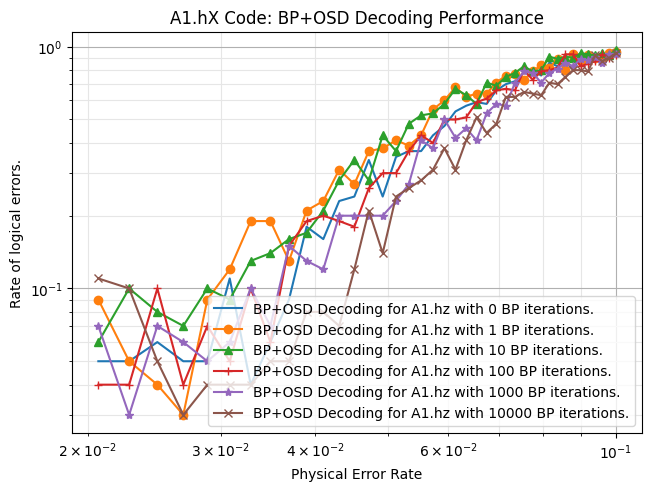

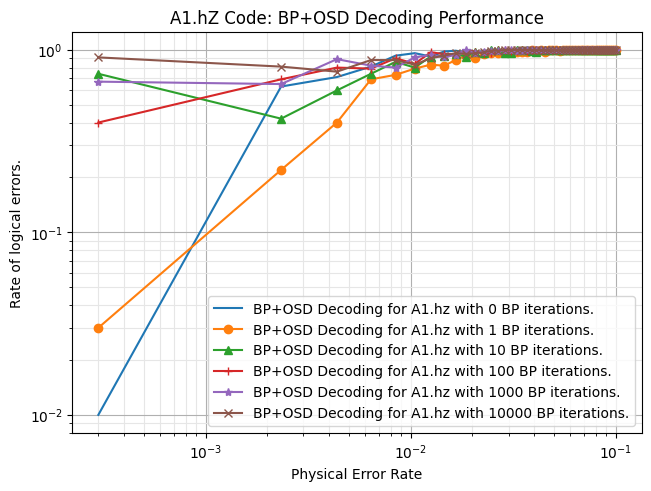

In [18]:
figX, axX = plt.subplots(1, 1, layout='constrained')
axX.set(title='A1.hX Code: BP+OSD Decoding Performance', xlabel='Physical Error Rate', ylabel='Rate of logical errors.')

for iters in range(len(numberOfIterations)):
    axX.loglog(totalRange[10:], berDictionary[f"X_decode_ber_{numberOfIterations[iters]}_iterations"][10:]/numberOfShots, markers[iters], label = f"BP+OSD Decoding for A1.hz with {numberOfIterations[iters]} BP iterations.")    
    #ax1.loglog(totalRange, phyErrors/(numberOfShots * code.N), '-', label = 'Physical Errors, actual (sanity check).')
# #ax1.axvspan(0, 0.1, facecolor='lightblue', alpha=0.3, 'Region tested by IBM')   # Left side background
# #ax1.axvspan(0.1, 0.5, facecolor='lightgreen', alpha=0.3, 'Region by Panteleev and Kalachev') # Right side background
axX.legend()
axX.grid()
axX.grid(which="minor", color="0.9")


figZ, axZ = plt.subplots(1, 1, layout='constrained')
axZ.set(title='A1.hZ Code: BP+OSD Decoding Performance', xlabel='Physical Error Rate', ylabel='Rate of logical errors.')

for iters in range(len(numberOfIterations)):
    axZ.loglog(totalRange, berDictionary[f"Z_decode_ber_{numberOfIterations[iters]}_iterations"]/numberOfShots, markers[iters], label = f"BP+OSD Decoding for A1.hz with {numberOfIterations[iters]} BP iterations.")    
    #ax1.loglog(totalRange, phyErrors/(numberOfShots * code.N), '-', label = 'Physical Errors, actual (sanity check).')
# #ax1.axvspan(0, 0.1, facecolor='lightblue', alpha=0.3, 'Region tested by IBM')   # Left side background
# #ax1.axvspan(0.1, 0.5, facecolor='lightgreen', alpha=0.3, 'Region by Panteleev and Kalachev') # Right side background
axZ.legend()
axZ.grid()
axZ.grid(which="minor", color="0.9")